In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=sns.load_dataset("titanic")
# df = pd.read_csv('train.csv')
df.drop(columns=["who","adult_male","embarked","alive"],inplace=True)


In [ ]:
#train.csv otomatik load olmadığından titanic'i sns ile load ettim o yüzden en baştaki çalışmalarıma titanic için güncelliyorum
for x in df.columns[-6:]:
 print(df[x].head(5))
#who=sex , adult_male bulunabilir,embark_town embarked yerine geçer ,alive=survived,alone lazım

0    0
1    0
2    0
3    0
4    0
Name: parch, dtype: int64
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: fare, dtype: float64
0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']
0    NaN
1      C
2    NaN
3      C
4    NaN
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: embark_town, dtype: object
0    False
1    False
2     True
3    False
4     True
Name: alone, dtype: bool


1-Veri Setini Tanıtma

In [ ]:
df.columns



Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'deck', 'embark_town', 'alone'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   deck         203 non-null    category
 9   embark_town  889 non-null    object  
 10  alone        891 non-null    bool    
dtypes: bool(1), category(2), float64(2), int64(4), object(2)
memory usage: 58.9+ KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2.1 Eksik değer analizi ve özet istatistikler

In [ ]:
df.isna().sum()


for x in df.columns:
  if df[x].isna().any():
    print(x)
#Eksik veri olanları buldum

age
deck
embark_town


2.2  Kategorik ve sayısal değişkenlerim dağılımı

In [ ]:
for x in df.columns:
 if len(df[x].unique())<205 and x!="age":
  print(f"{x}'nın değerleri:{df[x].unique()}")
#Bu kodum sayesinde hangi değerler üzeridej verilerde yazmıyor onu buluyorum (neden 205 çünkü cabin lazım ve diğer columnların sayısal değerlerine ulaşmak istemiyorum)


survived'nın değerleri:[0 1]
pclass'nın değerleri:[3 1 2]
sex'nın değerleri:['male' 'female']
sibsp'nın değerleri:[1 0 3 4 2 5 8]
parch'nın değerleri:[0 1 2 5 3 4 6]
class'nın değerleri:['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
deck'nın değerleri:[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
embark_town'nın değerleri:['Southampton' 'Cherbourg' 'Queenstown' nan]
alone'nın değerleri:[False  True]


2.3 Outlier tespiti

<Axes: >

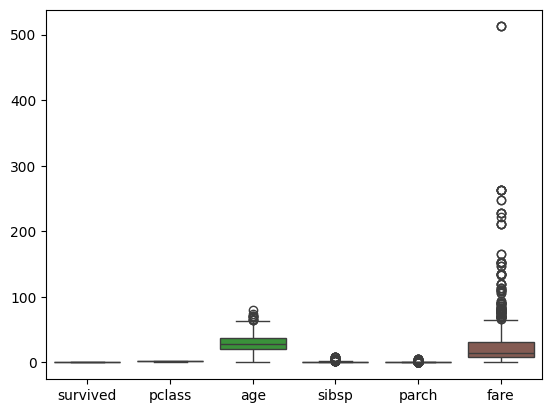

In [ ]:
a=df.select_dtypes(include=["number"])
sns.boxplot(a)
#age,sibsp,parch,fare'de outlier tespiti

3 Veri Görselleştirme

In [ ]:

df["sex"].replace(to_replace=["male","female"],value=[1,0],inplace=True)
#0,1 olarak aldım ve numerik grafiklerde kullanmak için
num_col=df.select_dtypes(include=[int,float]).columns

df[num_col].corr()


/tmp/ipython-input-3105084376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sex"].replace(to_replace=["male","female"],value=[1,0],inplace=True)
/tmp/ipython-input-3105084376.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"].replace(to_replace=["male","female"],value=[1,0],inpl

,survived,pclass,sex,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


Sırayla okuturken hata çıkmasın diye ilerideki kodları buraya kopyaladım

In [ ]:
a=df["age"].mean()

df["age"].fillna(float(a),inplace=True)

df["age"].count()

#drop etmedim değerli veriler vardı
#eksik verileri ortalama ile doldurdum ki tutarlı olsun





/tmp/ipython-input-3044782142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(float(a),inplace=True)


np.int64(891)

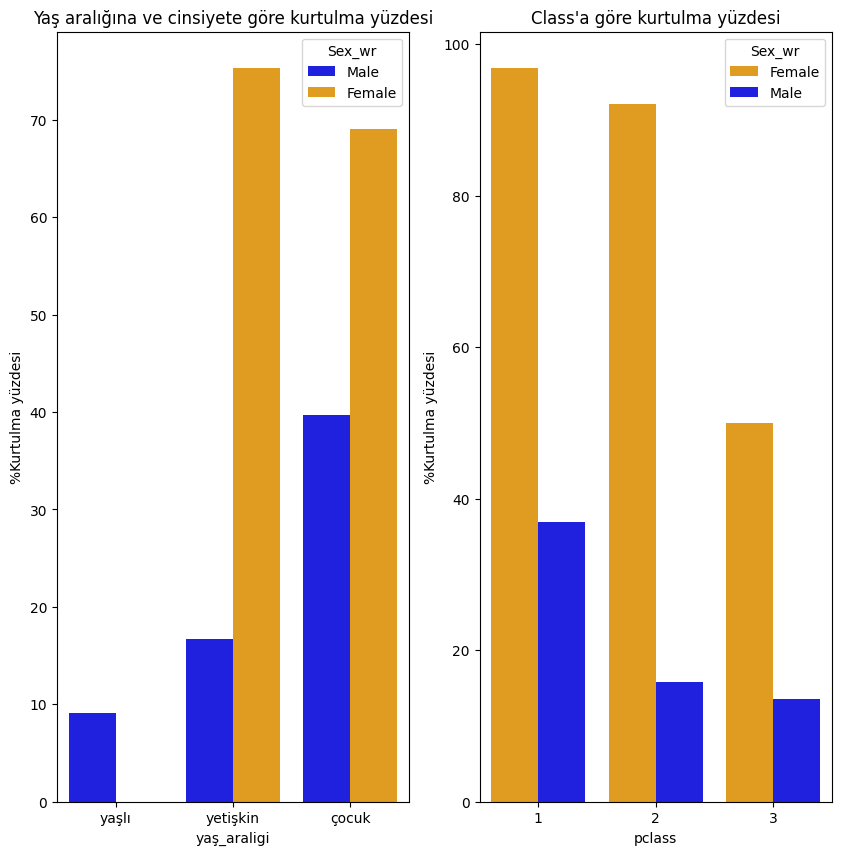

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(10,10))

df["yaş_araligi"]=df["age"].apply(lambda x:"çocuk" if  0<=x<18 else("yetişkin" if 18<=x<65 else "yaşlı"))

df["Sex_wr"]=df["sex"].apply(lambda x: "Male" if x==1 else "Female")
df["Kurtulma_yüzdesi"] = df["survived"] * 100

yaş_by_surv=df.groupby(["yaş_araligi","Sex_wr"])["Kurtulma_yüzdesi"].mean().reset_index()
sns.barplot(data=yaş_by_surv,x="yaş_araligi",y="Kurtulma_yüzdesi",hue="Sex_wr",ax=axes[0],palette={"Male":"blue","Female":"orange"})
axes[0].set_title("Yaş aralığına ve cinsiyete göre kurtulma yüzdesi")
axes[0].set_ylabel("%Kurtulma yüzdesi")


pclass_surv=df.groupby(["pclass","Sex_wr"])["Kurtulma_yüzdesi"].mean().reset_index()
sns.barplot(data=pclass_surv,x="pclass",y="Kurtulma_yüzdesi",hue="Sex_wr",ax=axes[1],palette={"Female":"orange","Male":"blue"})#Class'a göre kurtulanların ortalaması
axes[1].set_title("Class'a göre kurtulma yüzdesi")
axes[1].set_ylabel("%Kurtulma yüzdesi")
#Sınıf kalitesi yüksek olanlar alt kalite sınıflara göre daha yüksek oranda kurtuldu
#Yaşlıların çoğu öldü,kurtulanların ise çoğu kadın

plt.show()

<Axes: xlabel='fare', ylabel='age'>

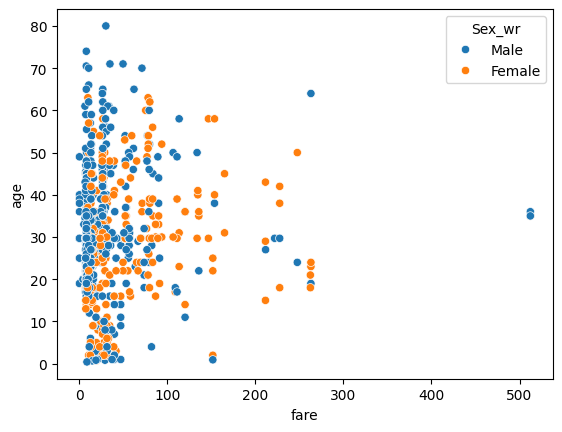

In [ ]:
age_money_sex=sns.scatterplot(data=df,x="fare",y="age",hue="Sex_wr")
age_money_sex
#fiyata göre yaş ve cinsiyet grafiği

In [ ]:
# df["Kurtulma_yüzdesi"] = df["survived"] * 100

# pclass_surv=df.groupby(["pclass","Sex_wr"])["Kurtulma_yüzdesi"].mean().reset_index()
# sns.barplot(data=pclass_surv,x="pclass",y="Kurtulma_yüzdesi",hue="Sex_wr",palette={"Female":"orange","Male":"blue"})#Class'a göre kurtulanların ortalaması
# plt.xlabel("Uçus Class'ı")
# plt.ylabel("%Kurtulma yüzdesi")
# plt.title("Class'a göre kurtulma yüzdesi")
# plt.show()

4-Veri Ön işleme (Eksik verileri doldurma)

In [ ]:

a=df["age"].mean()

df["age"].fillna(float(a),inplace=True)

df["age"].count()



/tmp/ipython-input-2541525518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(float(a),inplace=True)


np.int64(891)

Ekstra(Üstteki kodları çalıştırdıktan sonra çalıştırın)


bu train.csv içindi

In [ ]:
# df.drop(["passengerId","ticket"],axis=1,inplace=True)#büyük oranda işe yaramaz

# df.set_index("name",drop=True,inplace=True)#Daha okunaklı
# df

In [ ]:
df["age"].mean()

np.float64(29.69911764705882)

In [ ]:
df.groupby("pclass")["survived"].mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
df['bilet_fiyat_araligi']=df['fare'].apply(lambda x:"0 ile 100 arası bilet fiyatları" if 0<x<100 else("100 ile 200 arası bilet fiyatları" if 100<x<200 else "200 ile 500 arası bilet fiyatları"))
bilet_fiyat_araligina_göre_kurtulma_yüzdesi=df.groupby("bilet_fiyat_araligi")["survived"].mean()
bilet_fiyat_araligina_göre_kurtulma_yüzdesi

,survived
bilet_fiyat_araligi,
0 ile 100 arası bilet fiyatları,0.366950
100 ile 200 arası bilet fiyatları,0.757576
200 ile 500 arası bilet fiyatları,0.428571


In [ ]:
df["yaş_araligi"]=df["age"].apply(lambda x:"çocuk" if  0<=x<18 else("yetişkin" if 18<=x<65 else "yaşlı"))

yaş_araligi_yüzdesine_göre_yüzde=df.groupby("yaş_araligi")["survived"].mean()

yaş_araligi_yüzdesine_göre_yüzde

,survived
yaş_araligi,
yaşlı,0.090909
yetişkin,0.365059
çocuk,0.539823


In [ ]:
df["yaş_araligi"]=df["age"].apply(lambda x:"çocuk" if  0<=x<18 else("yetişkin" if 18<=x<65 else "yaşlı"))
yaş_araligi_yüzdesine_göre_yüzde=df.groupby("yaş_araligi")["survived"].mean()

cinsiyet_kurtulma_yüzdesi= df.groupby("sex")["survived"].mean()


print(cinsiyet_kurtulma_yüzdesi)
print(yaş_araligi_yüzdesine_göre_yüzde)
#bu sayede cinsiyet ya da yaş aralığına göre kurtulma yüzdemi buldum.

sex
0    0.742038
1    0.188908
Name: survived, dtype: float64
yaş_araligi
yaşlı       0.090909
yetişkin    0.365059
çocuk       0.539823
Name: survived, dtype: float64


DEVAM EDECEK

 1-Veri Setini Tanıt:
+Seçtiğin veri seti nedir?
-Seçtiğim veri seti Titanic

+İçinde hangi değişkenler (feature) var?
-İçinde ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'deck', 'embark_town', 'alone']

+Veri setinin boyutu ne?
-891 row, 12 column

 2-Temel Veri Analizi (EDA):
+Eksik değer analizi ve özet istatistikler
-age,cabin,embark_town

+Kategorik ve sayısal değişkenlerin dağılımı
-Kategorik:

survived'nın değerleri:[0 1]

pclass'nın değerleri:[3 1 2]

sex'nın değerleri:['male' 'female']

sibsp'nın değerleri:[1 0 3 4 2 5 8]

parch'nın değerleri:[0 1 2 5 3 4 6]

class'nın değerleri:['Third', 'First', 'Second']

Categories (3, object): ['First', 'Second', 'Third']

deck'nın değerleri:[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']

Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

embark_town'nın değerleri:['Southampton' 'Cherbourg' 'Queenstown' nan]

alone'nın değerleri:[False  True]

survived'nın değerleri:[0 1]

bu sayede embark_town'da NaN buldum




+Gerekirse outlier tespiti (boxplot, IQR vs.)
-Tespit edildi

 3-Veri Görselleştirme
+Seaborn / Matplotlib / Plotly ile grafikler
-Kullanıldı

+İlişkileri gösteren grafikler (örn: korelasyon matrisi, scatterplot)
-corr ile doğrusal ilişkilere baktım

 4-Veri Ön İşleme
+Eksik verileri doldurma / çıkarma
-age'deki eksik 177 kişi mean ile dolduracağım
-embark_town 2 NaN var

+Kategorik değişkenleri kodlama (OneHotEncoder, LabelEncoder)
-Henüz bilmiyorum

+Gerekirse normalizasyon / ölçekleme
-Henüz bilmiyorum

5-Basit Bir Modelleme
-Henüz bilmiyorum

6.Sonuçların Yorumlanması
+Modelin doğruluğu ne çıktı?
-corr ile doğrusal ilişkilere baktım
-Regresyonu henüz bilmiyorum

+Hangi değişkenler önemli görünüyordu?
-survived

+Ne öğrenmiş oldun?
-Veri analizinin başlarındayım.Daha iyi öğrenmek için veri bilimi kütüphanelerini öğreniyorum ve bu bilgileri kendime kattıkça bu soruların cevaplarını güncelliyorum.

